<a href="https://colab.research.google.com/github/limeng1011/DeterminantsofEarnings/blob/main/DeterminantsofEarnings050222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 6.9 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


###  Import Statements


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [ ]:
df_data = pd.read_csv('NLSY97_subset.csv')
df_data.head()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0


In [ ]:
df_data.shape

(2000, 96)

In [ ]:
df_variables = pd.read_csv('NLSY97_Variable_Names_and_Descriptions.csv')
df_variables.head(20)

,Personal variables,Variable Type,Description
0,FEMALE,D,"Sex of respondent (0 if male, 1 if female)"
1,MALE,D,"Sex of respondent (1 if male, 0 if female)"
2,NaN,NaN,NaN
3,Ethnicity:,NaN,NaN
4,ETHBLACK,D,Black
5,ETHHISP,D,Hispanic
6,ETHWHITE,D,"Non-black, non-hispanic"
7,NaN,NaN,NaN
8,AGE,C,Age in 2011
9,BYEAR,C,Year of birth


In [ ]:
df_variables.shape

(122, 3)

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape
print(f'The table has {df_data.shape[0]} rows and {df_data.shape[1]} columns.')

The table has 2000 rows and 96 columns.


In [ ]:
df_data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2000 non-null   int64  
 1   EARNINGS  2000 non-null   float64
 2   S         2000 non-null   int64  
 3   EXP       2000 non-null   float64
 4   FEMALE    2000 non-null   int64  
 5   MALE      2000 non-null   int64  
 6   BYEAR     2000 non-null   int64  
 7   AGE       2000 non-null   int64  
 8   AGEMBTH   1956 non-null   float64
 9   HHINC97   1630 non-null   float64
 10  POVRAT97  1627 non-null   float64
 11  HHBMBF    2000 non-null   int64  
 12  HHBMOF    2000 non-null   int64  
 13  HHOMBF    2000 non-null   int64  
 14  HHBMONLY  2000 non-null   int64  
 15  HHBFONLY  2000 non-null   int64  
 16  HHOTHER   2000 non-null   int64  
 17  MSA97NO   2000 non-null   int64  
 18  MSA97NCC  2000 non-null   int64  
 19  MSA97CC   2000 non-null   int64  
 20  MSA97NK   2000 non-null   int6

In [ ]:
df_data.duplicated().values.any()

True

In [ ]:
df_data.isna().values.any()

True

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [ ]:
df_data[df_data.duplicated()]

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
1000,4693,14.50,12,7.25,0,1,1981,30,20.00,"40,700.00",...,1,0,0,0,1,0,1,0,0,0
1004,4827,38.48,16,8.50,0,1,1981,30,34.00,"27,700.00",...,0,1,0,0,0,0,1,0,0,0
1006,4176,4.29,16,2.04,0,1,1980,31,23.00,"2,500.00",...,1,0,0,1,0,0,1,0,0,0
1012,3256,10.00,12,8.02,0,1,1984,27,21.00,"43,000.00",...,0,0,1,0,0,0,1,0,0,0
1015,4600,52.00,17,9.08,0,1,1980,31,28.00,"48,900.00",...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,2740,14.00,12,12.44,1,0,1980,31,27.00,"81,800.00",...,1,0,1,0,0,0,1,0,0,0
1996,1119,14.83,18,1.92,1,0,1983,28,28.00,"50,000.00",...,1,1,0,0,0,0,1,0,0,0
1997,3561,35.88,18,2.67,1,0,1984,27,29.00,"77,610.00",...,1,0,0,1,0,0,0,1,0,0
1998,5980,25.48,16,4.71,1,0,1982,29,23.00,"69,300.00",...,0,0,0,1,0,0,1,0,0,0


In [ ]:
df_data[df_data['ID']==4693]

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
91,4693,14.50,12,7.25,0,1,1981,30,20.00,"40,700.00",...,1,0,0,0,1,0,1,0,0,0
1000,4693,14.50,12,7.25,0,1,1981,30,20.00,"40,700.00",...,1,0,0,0,1,0,1,0,0,0


In [ ]:
clean_df = df_data.drop_duplicates(keep='first')
clean_df.duplicated().values.any()

False

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487 entries, 0 to 1995
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1487 non-null   int64  
 1   EARNINGS  1487 non-null   float64
 2   S         1487 non-null   int64  
 3   EXP       1487 non-null   float64
 4   FEMALE    1487 non-null   int64  
 5   MALE      1487 non-null   int64  
 6   BYEAR     1487 non-null   int64  
 7   AGE       1487 non-null   int64  
 8   AGEMBTH   1453 non-null   float64
 9   HHINC97   1205 non-null   float64
 10  POVRAT97  1203 non-null   float64
 11  HHBMBF    1487 non-null   int64  
 12  HHBMOF    1487 non-null   int64  
 13  HHOMBF    1487 non-null   int64  
 14  HHBMONLY  1487 non-null   int64  
 15  HHBFONLY  1487 non-null   int64  
 16  HHOTHER   1487 non-null   int64  
 17  MSA97NO   1487 non-null   int64  
 18  MSA97NCC  1487 non-null   int64  
 19  MSA97CC   1487 non-null   int64  
 20  MSA97NK   1487 non-null   int6

In [ ]:
clean_df = clean_df.dropna(axis=0)
clean_df.isna().values.any()
clean_df.shape

(492, 96)

## Descriptive Statistics

In [ ]:
clean_df.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,...,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00
mean,"3,530.57",19.13,14.89,5.92,0.49,0.51,"1,982.98",28.02,26.74,"66,732.78",...,0.75,0.13,0.31,0.35,0.21,0.05,0.54,0.41,0.00,0.00
std,"1,948.08",11.54,2.69,2.51,0.50,0.50,0.82,0.82,4.71,"44,951.87",...,0.44,0.33,0.46,0.48,0.41,0.22,0.50,0.49,0.05,0.00
min,28.00,2.13,8.00,0.00,0.00,0.00,"1,982.00",27.00,17.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,833.25",12.00,12.00,4.24,0.00,0.00,"1,982.00",27.00,24.00,"40,725.00",...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,470.50",16.00,16.00,5.75,0.00,1.00,"1,983.00",28.00,26.00,"58,027.50",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,186.75",24.04,17.00,7.75,1.00,1.00,"1,984.00",29.00,30.00,"77,432.50",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,978.00",123.08,20.00,12.33,1.00,1.00,"1,984.00",29.00,41.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


In [ ]:
df_variables = pd.read_csv('NLSY97_Variable_Names_and_Descriptions.csv')
df_variables.head(20)

,Personal variables,Variable Type,Description
0,FEMALE,D,"Sex of respondent (0 if male, 1 if female)"
1,MALE,D,"Sex of respondent (1 if male, 0 if female)"
2,NaN,NaN,NaN
3,Ethnicity:,NaN,NaN
4,ETHBLACK,D,Black
5,ETHHISP,D,Hispanic
6,ETHWHITE,D,"Non-black, non-hispanic"
7,NaN,NaN,NaN
8,AGE,C,Age in 2011
9,BYEAR,C,Year of birth


## Visualise the Features

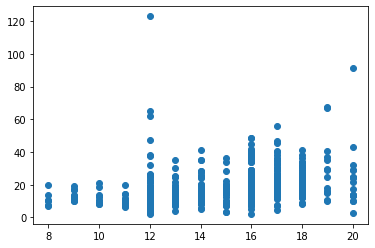

In [ ]:
plt.scatter(clean_df.S, clean_df.EARNINGS)

In [ ]:
px.scatter(x = clean_df['S'],
           y = clean_df['EARNINGS'])

In [ ]:
px.scatter(clean_df,
           x = 'EARNINGS', 
           y = ['S', 'EXP'])

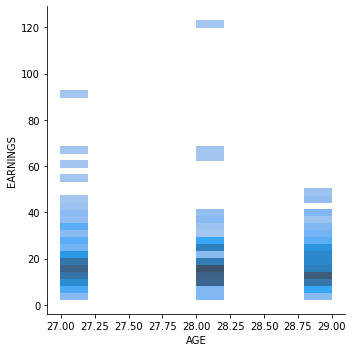

In [ ]:
sns.displot(clean_df,
            x = 'AGE',
            y = 'EARNINGS')

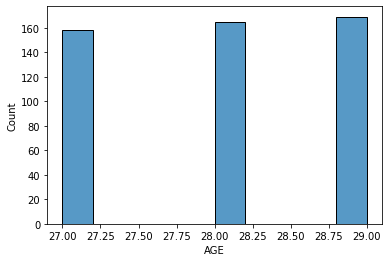

In [ ]:
sns.histplot(clean_df,
             x = 'AGE',)

In [ ]:
clean_df['AGE'].value_counts()

29    169
28    165
27    158
Name: AGE, dtype: int64

In [ ]:
clean_df['BYEAR'].value_counts()

1982    169
1983    165
1984    158
Name: BYEAR, dtype: int64

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [ ]:
target = clean_df['EARNINGS']

In [ ]:
feature = np.array(clean_df['S'])

In [ ]:
feature.shape

(492,)

In [ ]:
feature = feature.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=10)

# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [ ]:
liregr = LinearRegression()

In [ ]:
liregr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(f'Coefficients: {liregr.coef_}')

Coefficients: [1.1280176]


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [ ]:
print(f'Mean squared error: {mean_squared_error(X_train, y_train)}')

Mean squared error: 150.81490050890585


In [ ]:
print(f'Coefficient of determination: {r2_score(X_train, y_train)}')

Coefficient of determination: -19.334713152188144


In [ ]:
reg = liregr.fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.06583332219487104

In [ ]:
reg.coef_

array([1.1280176])

In [ ]:
reg.intercept_

2.194919222341529

### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [ ]:
predicted_y = reg.predict(X_train)

In [ ]:
predicted_y1 = liregr.predict(X_train)

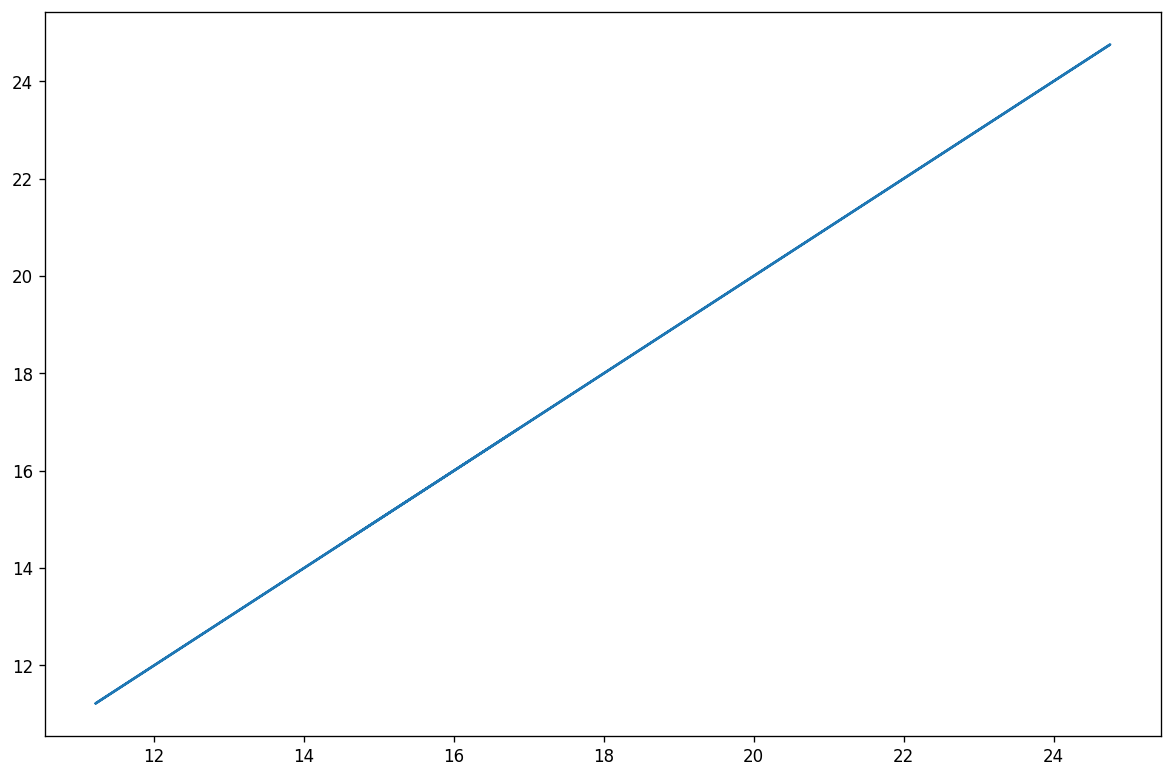

In [ ]:
plt.figure(figsize=(12,8), dpi=120)
plt.plot(predicted_y, predicted_y1)

In [ ]:
predicted_y

array([14.60311282, 16.85914802, 17.98716561, 16.85914802, 17.98716561,
       15.73113042, 20.24320081, 15.73113042, 21.37121841, 17.98716561,
       14.60311282, 21.37121841, 15.73113042, 17.98716561, 20.24320081,
       20.24320081, 15.73113042, 16.85914802, 15.73113042, 22.49923601,
       20.24320081, 17.98716561, 19.11518321, 23.62725361, 15.73113042,
       22.49923601, 19.11518321, 17.98716561, 20.24320081, 21.37121841,
       17.98716561, 23.62725361, 22.49923601, 15.73113042, 22.49923601,
       23.62725361, 20.24320081, 20.24320081, 21.37121841, 23.62725361,
       19.11518321, 15.73113042, 21.37121841, 16.85914802, 20.24320081,
       17.98716561, 22.49923601, 21.37121841, 15.73113042, 19.11518321,
       15.73113042, 21.37121841, 24.75527121, 17.98716561, 20.24320081,
       12.34707762, 20.24320081, 15.73113042, 24.75527121, 20.24320081,
       21.37121841, 21.37121841, 24.75527121, 20.24320081, 20.24320081,
       17.98716561, 21.37121841, 16.85914802, 19.11518321, 16.85

(array([ 6.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  7.,  0.,  0.,  0.,  8.,
         0.,  0.,  0., 68.,  0.,  0.,  0., 36.,  0.,  0.,  0.,  0., 35.,
         0.,  0.,  0., 19.,  0.,  0.,  0., 90.,  0.,  0.,  0., 48.,  0.,
         0.,  0., 40.,  0.,  0.,  0., 13.,  0.,  0.,  0., 13.]),
 array([11.21906002, 11.48978424, 11.76050847, 12.03123269, 12.30195691,
        12.57268114, 12.84340536, 13.11412959, 13.38485381, 13.65557803,
        13.92630226, 14.19702648, 14.4677507 , 14.73847493, 15.00919915,
        15.27992338, 15.5506476 , 15.82137182, 16.09209605, 16.36282027,
        16.6335445 , 16.90426872, 17.17499294, 17.44571717, 17.71644139,
        17.98716561, 18.25788984, 18.52861406, 18.79933829, 19.07006251,
        19.34078673, 19.61151096, 19.88223518, 20.15295941, 20.42368363,
        20.69440785, 20.96513208, 21.2358563 , 21.50658053, 21.77730475,
        22.04802897, 22.3187532 , 22.58947742, 22.86020164, 23.13092587,
        23.40165009, 23.67237432, 23.94309854, 24.21382276,

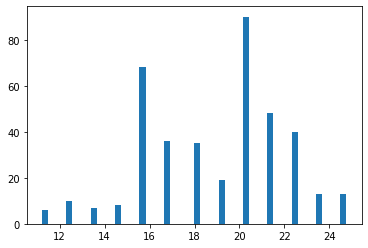

In [ ]:
predicted_y
plt.hist(predicted_y, bins=50)

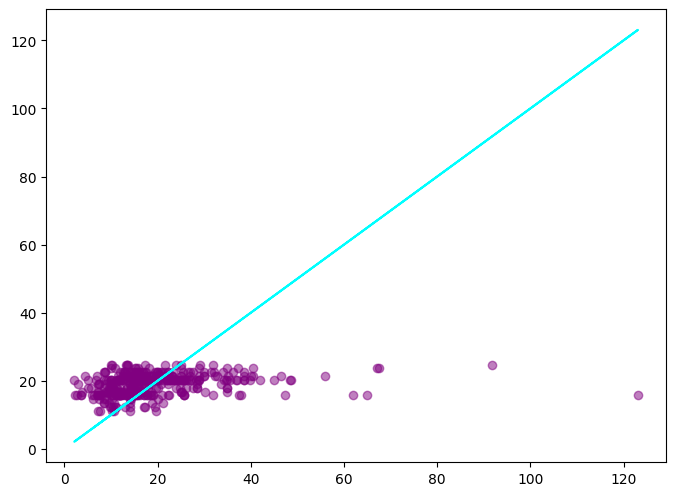

In [ ]:
predicted_values = liregr.predict(X_train)
plt.figure(figsize = (8,6), dpi=100)
plt.scatter(y_train, predicted_values, c='purple', alpha=0.5)
plt.plot(y_train, y_train, c='cyan')
plt.show()

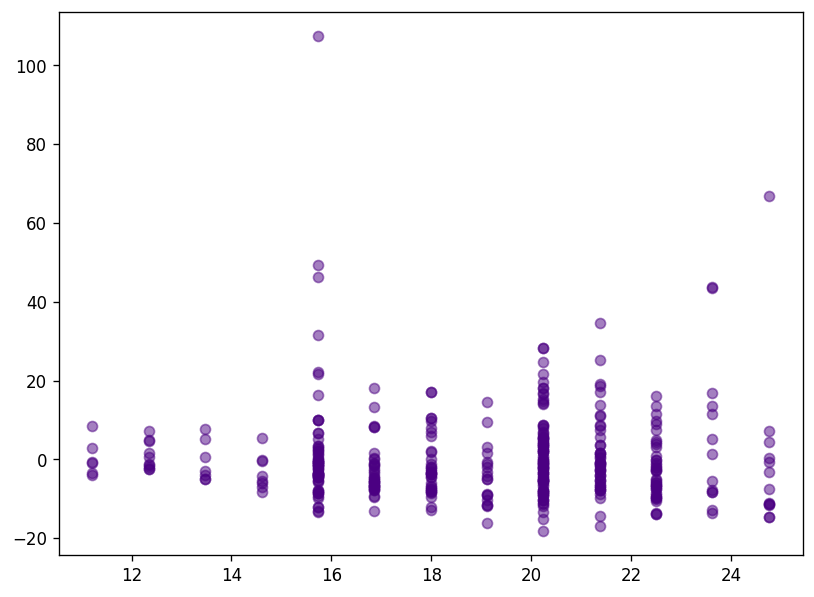

In [ ]:
residuals = y_train - predicted_values
plt.figure(figsize=(8,6), dpi=120)
plt.scatter(predicted_values, residuals, c='indigo', alpha=0.5)
plt.show()

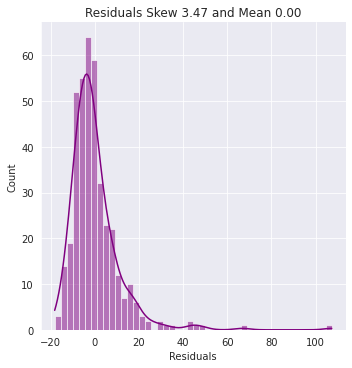

In [ ]:
with sns.axes_style('darkgrid'):
  sns.displot(residuals, kde=True, color='purple')
plt.title(f'Residuals Skew {residuals.skew():.2f} and Mean {residuals.mean():.2f}')
plt.xlabel('Residuals')
plt.show()

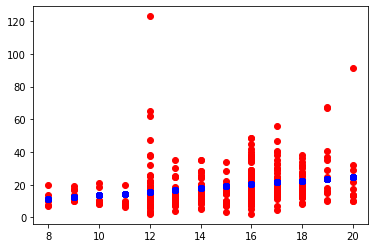

In [ ]:
plt.scatter(X_train, 
            y_train,
            color = 'red')
plt.scatter(X_train,
            predicted_y,
            color = 'blue')
plt.show()

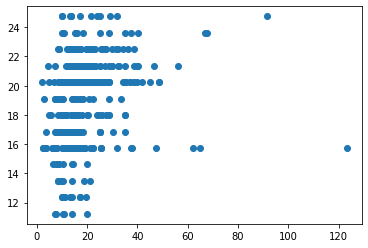

In [ ]:
plt.scatter(y_train,
            predicted_y)

In [ ]:
residuals = y_train - predicted_y

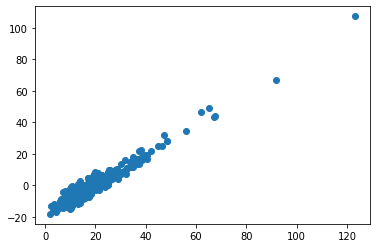

In [ ]:
plt.scatter(y_train,
            residuals)

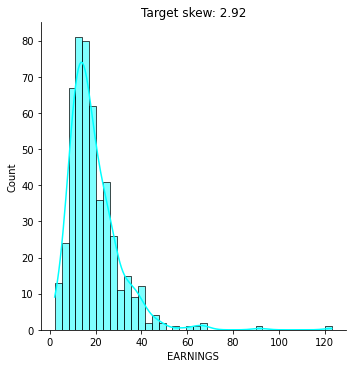

In [ ]:
sns.displot(clean_df['EARNINGS'],
            kde = True,
            color = 'cyan')
plt.title(f"Target skew: {clean_df['EARNINGS'].skew():.2f}")
plt.show()

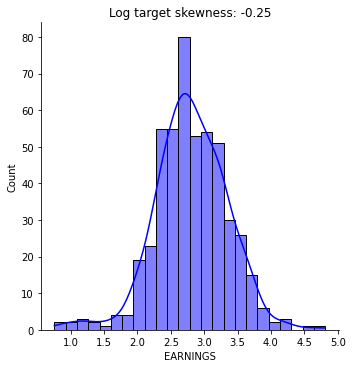

In [ ]:
log_earning = np.log(clean_df['EARNINGS'])
sns.displot(log_earning,
            kde = True,
            color = 'blue')
plt.title(f"Log target skewness: {log_earning.skew():.2f}")
plt.show()


In [ ]:
log_target = log_earning
feature = clean_df['S']
feature = np.array(feature).reshape(-1,1)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(feature, log_target, train_size=0.8, random_state=10)

In [ ]:
liregr_log = LinearRegression()
reg_log = liregr_log.fit(X_train_log, y_train_log)
print(f'Coefficient: {reg_log.coef_}')
print(f'Intersect: {reg_log.intercept_}')
print(f'The new r-squared using log: {liregr_log.score(X_train_log, y_train_log)}')
print(f'The old r-squared: {liregr.score(X_train, y_train)}')

print(f'The new r-squared using log: {reg_log.score(X_train_log, y_train_log)}')
print(f'The old r-squared: {reg.score(X_train, y_train)}')

Coefficient: [0.06505319]
Intersect: 1.8260506465854798
The new r-squared using log: 0.10582509601290191
The old r-squared: 0.06583332219487104
The new r-squared using log: 0.10582509601290191
The old r-squared: 0.06583332219487104


In [ ]:
print(f'Using test dataset, The new r-squared using log: {liregr_log.score(X_test_log, y_test_log)}')
print(f'Using test dataset, The old r-squared: {liregr.score(X_test, y_test)}')

print(f'Using test dataset, The new r-squared using log: {reg_log.score(X_test_log, y_test_log)}')
print(f'Using test dataset, The old r-squared: {reg.score(X_test, y_test)}')

Using test dataset, The new r-squared using log: 0.11868701290827244
Using test dataset, The old r-squared: 0.16461900998376156
Using test dataset, The new r-squared using log: 0.11868701290827244
Using test dataset, The old r-squared: 0.16461900998376156


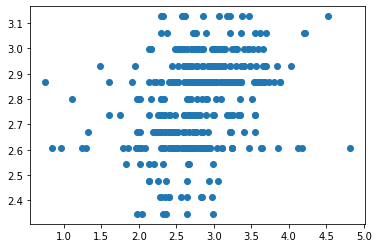

In [ ]:
predicted_values_log = liregr_log.predict(X_train_log)
plt.scatter(y_train_log, predicted_values_log)

Text(0.5, 1.0, 'Sknews of residual: -0.1139850352338295')

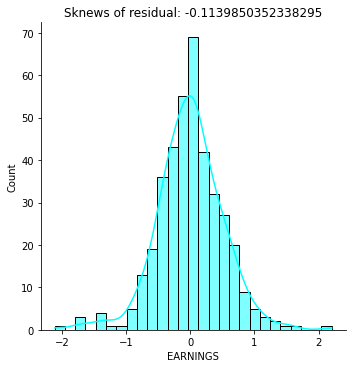

In [ ]:
residuals_log = y_train_log - predicted_values_log
sns.displot(residuals_log,
            kde = True,
            color = 'cyan')
plt.title(f'Sknews of residual: {residuals_log.skew()}')

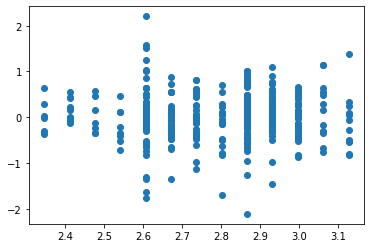

In [ ]:
plt.scatter(predicted_values_log, residuals_log)

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [ ]:
target2 = clean_df['EARNINGS']
features2 = clean_df[['S','EXP']]

In [ ]:
liregr2 = LinearRegression()

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, train_size = 0.8)

In [ ]:
reg2 = liregr2.fit(X_train2, y_train2)

In [ ]:
print(f'The coefficient is: {reg2.coef_}')
print(f'The intersect is: {reg2.intercept_}')

The coefficient is: [1.7056688  0.81096464]
The intersect is: -11.280039490928907


In [ ]:
print(f'The R score is: {reg2.score(X_train2, y_train2)}')

The R score is: 0.12327521277499054


In [ ]:
target2_log = np.log(clean_df['EARNINGS'])
X_train2_log, X_test2_log, y_train2_log, y_test2_log = train_test_split(features2, target2_log, train_size = 0.8)
liregr2_log = LinearRegression()
reg2_log = liregr2_log.fit(X_train2_log, y_train2_log)

In [ ]:
print(f'The coefficient is: {reg2_log.coef_}')
print(f'The intersect is: {reg2_log.intercept_}')
print(f'The R score using log is: {reg2_log.score(X_train2_log, y_train2_log)}')

The coefficient is: [0.09947078 0.04846096]
The intersect is: 1.035697735903163
The R score using log is: 0.15053599045558164


In [ ]:
print(f'Using test dataset, The R score using log is: {reg2_log.score(X_test2_log, y_test2_log)}')

Using test dataset, The R score using log is: 0.11626326640399998


In [ ]:
predicted_values2_log = liregr2_log.predict(X_train2_log)
residuals2_log = y_train2_log - predicted_values2_log

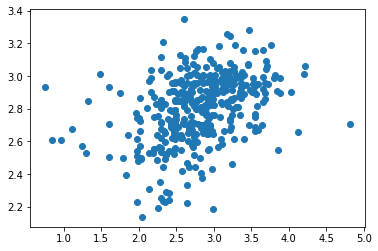

In [ ]:
plt.scatter(y_train2_log, predicted_values2_log)


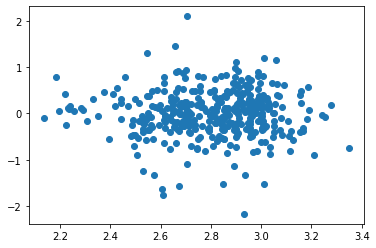

In [ ]:
plt.scatter(predicted_values2_log, residuals2_log)

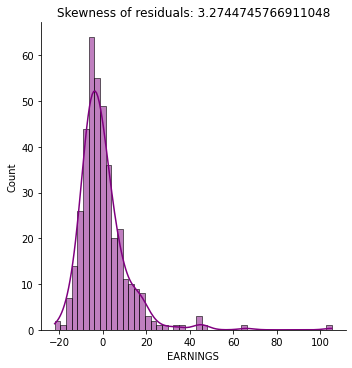

In [ ]:
sns.displot(residuals2,
            kde = True,
            color = 'purple')
plt.title(f'Skewness of residuals: {residuals2.skew()}')
plt.show()

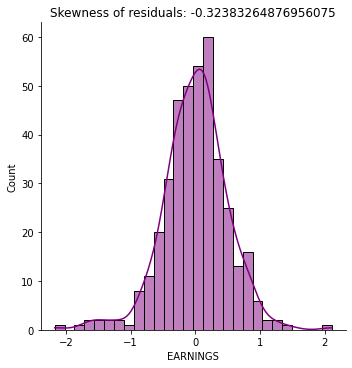

In [ ]:
sns.displot(residuals2_log,
            kde = True,
            color = 'purple')
plt.title(f'Skewness of residuals: {residuals2_log.skew()}')
plt.show()

In [ ]:
predicted_y2 = liregr2.predict(X_train2)

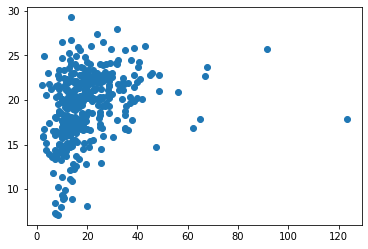

In [ ]:
plt.scatter(y_train2,
            predicted_y2)

In [ ]:
residuals2 = y_train2 - predicted_y2

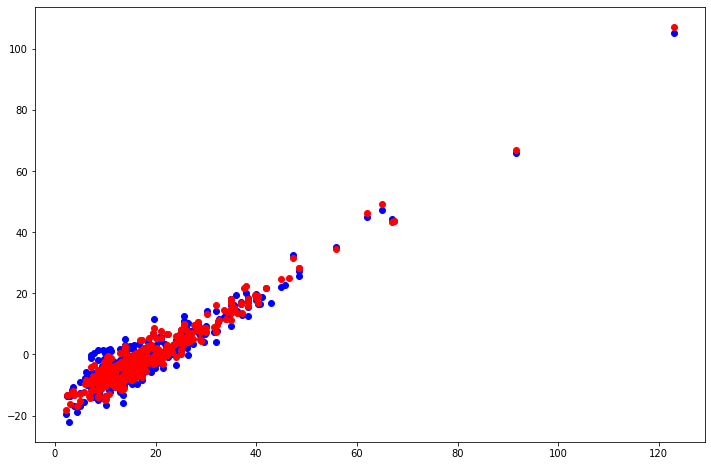

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(y_train2, residuals2, color ='blue')
plt.scatter(y_train, residuals, color = 'red')
plt.show()

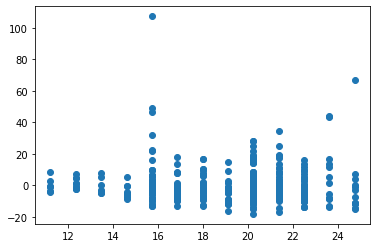

In [ ]:
plt.scatter(predicted_y, residuals)

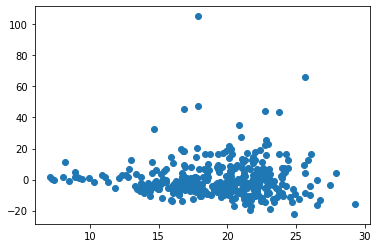

In [ ]:
plt.scatter(predicted_y2, residuals2)

In [ ]:
print(f'R square in test set in single variable regression: {reg.score(X_test, y_test)}')
print(f'R square in test set in multi variable regression: {reg2.score(X_test2, y_test2)}')

R square in test set in single variable regression: 0.16461900998376156
R square in test set in multi variable regression: 0.15062190150941668


### Evaluate the Coefficients of the Model

### Analyse the Estimated Values & Regression Residuals

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [ ]:
someone = pd.DataFrame(data=[16], columns=['S'])
someone

,S
0,16


In [ ]:
liregr.predict(someone)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



array([20.24320081])

In [ ]:
np.exp(liregr_log.predict(someone))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



array([17.58245802])

In [ ]:
reg.predict([[16],])

array([20.24320081])

In [ ]:
reg2.predict([[16,5]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([20.45114649])

In [ ]:
someone2 = pd.DataFrame(data=[[16,5]], columns=['S','EXP'])
someone2

,S,EXP
0,16,5


In [ ]:
liregr2.predict(someone2)

array([20.06548447])

In [ ]:
np.exp(liregr2_log.predict(someone2))

array([17.6288183])

# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 